# Fc1 and Fc2

Interpretation of the eigendirections? :) 
 
Directions in data? 

In [50]:
from functions import * 
LLM = 'OPT'
layer_idx = 27
f = 'fc1'
dt = np.float32

resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
eigenvalues = np.loadtxt(fname=resultsfolder + 'eigenvalues.txt',dtype=dt)
eigenvectors= np.loadtxt(fname=resultsfolder + 'eigenvectors.txt',dtype=dt)

f='fc1'
eig_id=0: spikes=array([1666, 1978, 2550, 2972, 3136])
eig_id=-1: spikes=array([], dtype=int64)


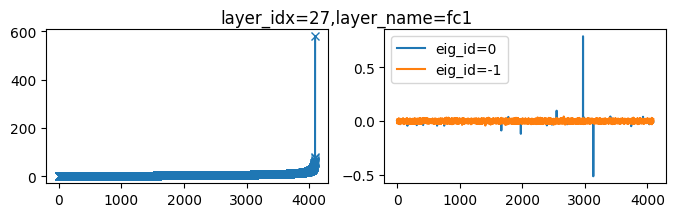

In [52]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,2))
n_sigmas = 5 
eig_ids = [0,-1]
print(f'{f=}')

ax1.plot(eigenvalues.real,'x-')

for eig_id in eig_ids:
  ax2.plot(eigenvectors[:,eig_id],label=f'{eig_id=}')
  x = np.abs(eigenvectors[:,eig_id])
  spikes = np.where(x>np.mean(x)+n_sigmas*np.std(x))[0]
  print(f'{eig_id=}: {spikes=}')

ax2.legend()
fig.suptitle(f'{layer_idx=},layer_name={f}')
plt.show()

# f='fc2'
# eig_id=0: spikes=array([1666, 1978, 2550, 2972])
# eig_id=-1: spikes=array([1347, 2394])

# f='fc1'
# eig_id=0: spikes=array([1666, 1978, 2550, 2972, 3136])
# eig_id=-1: spikes=array([], dtype=int64)

## Bias

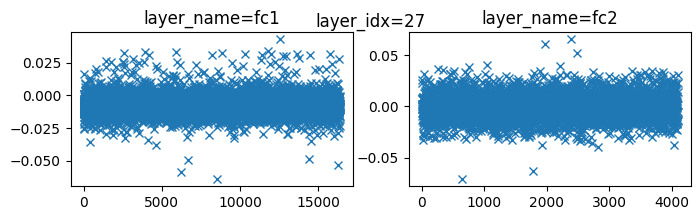

In [59]:
fig, axs = plt.subplots(1,2,figsize=(8,2))

for f_id,f in enumerate(['fc1','fc2']):
  resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
  bias = np.loadtxt(fname=resultsfolder + 'bias.txt',dtype=dt)
  axs[f_id].plot(bias,'x')
  axs[f_id].set_title(f'layer_name={f}')
fig.suptitle(f'{layer_idx=}')
plt.show()

# F = F2.F1

In [45]:
from functions import * 
LLM = 'OPT'
layer_idx = 27
dt = np.complex_
f = 'f'
resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
eigenvalues = np.loadtxt(fname=resultsfolder + 'eigenvalues.txt',dtype=dt)
eigenvectors= np.loadtxt(fname=resultsfolder + 'eigenvectors.txt',dtype=dt)

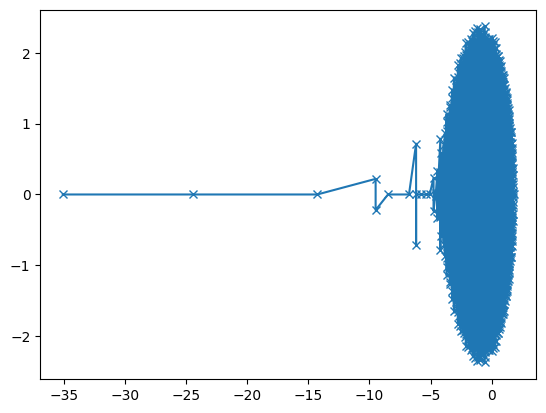

In [46]:
plt.plot(eigenvalues.real,eigenvalues.imag,'x-')

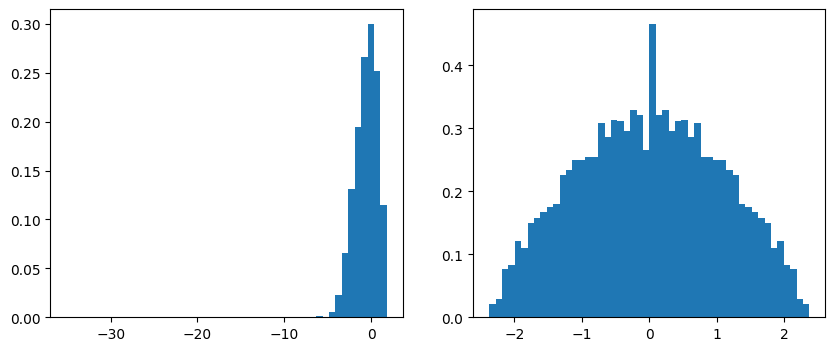

In [48]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.hist(eigenvalues.real,bins=50,alpha=1,density=True);
ax2.hist(eigenvalues.imag,bins=50,alpha=1,density=True);
plt.show()

# Q K V 

67.66464652307677

In [17]:
asd

101.70987147848724

In [4]:

# print(f'{l.self_attn=}')
# Q = output[7]['Q']
# K = output[7]['K']
V = output[23]['V']
print(f'{V.shape=}')
X = []
lambdas = []
eigvs = []
# hs = range(num_heads//2)
# hs = range(num_heads//2,num_heads)
hs = range(num_heads)
for h_idx,h in enumerate(hs):
  print(f'{h=}')
  X.append(np.tensordot(V[h,:,:],V[h,:,:],axes=([0],[0])))
  eigenvalues, eigenvectors = np.linalg.eigh(X[h_idx])
  lambdas.append(eigenvalues)
  eigvs.append(eigenvectors)
print(f'{X[h_idx].shape=}')
# print(Q.shape)
# print(K.shape)

  # with open(f'{weigthsfolder}/layer{layer_id}.pickle','wb') as g:
  #   pickle.dump(output,g)

# output['final_layer_norm'] = {'weight': md.base_model.final_layer_norm.weight.detach().numpy(),
#                                'bias': md.base_model.final_layer_norm.bias.detach().numpy()
#                              }

NameError: name 'output' is not defined

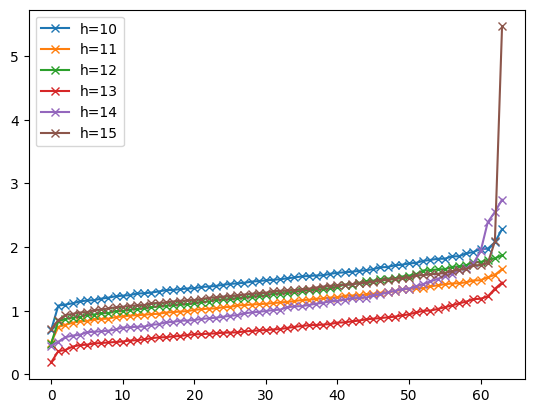

In [24]:
# for h_idx,h in enumerate(hs):
# for h_idx,h in enumerate(range(10)):
for h_idx,h in enumerate(range(10,15+1)):
  plt.plot(lambdas[h][1024-64:],'x-',label=f'{h=}')
plt.legend()
# lambdas[0].shape

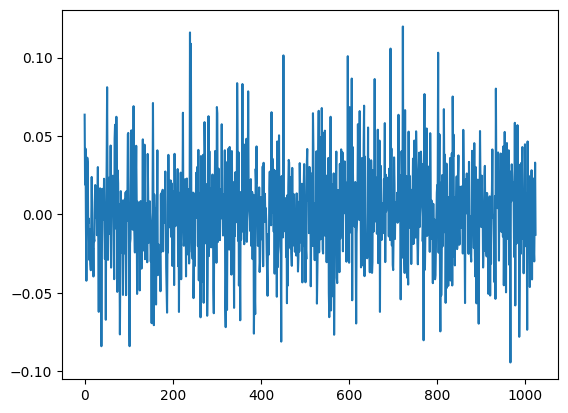

In [39]:
h = 15
# aux = np.sort(eigvs[h][:,-1])
# plt.plot(aux)
x = np.abs(eigvs[h][:,-1])
plt.plot(eigvs[h][:,-1])
# np.where(x>np.mean(x)+4*np.std(x))
jj = np.argmax(x)
plt.vlines(jj,np.min(x),np.max(x))